<font size=5>标准MNIST数据集作为基准

In [1]:
import tensorflow as tf
import itertools
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # 下载数据集

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)
训练集的样本数：60000，测试集的样本数：10000
输入图像的大小：28*28
训练集的图像类别分布： Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


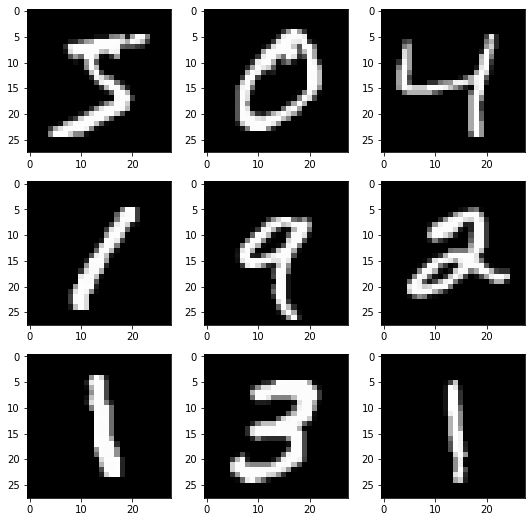

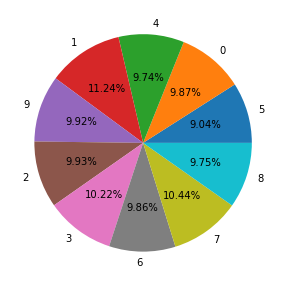

In [3]:
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)
#print(x_train[0])
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.savefig('sample.png', bbox_inches='tight', dpi=300)

print(f'训练集的样本数：{x_train.shape[0]}，测试集的样本数：{x_test.shape[0]}')
print(f'输入图像的大小：{x_train.shape[1]}*{x_train.shape[2]}')
label_cnt = Counter(y_train)  # 统计
print('训练集的图像类别分布：', label_cnt)
plt.figure(figsize=(5, 5))
plt.pie(x=label_cnt.values(),
        labels=label_cnt.keys(),
        autopct='%.2f%%')
plt.savefig('label_distribution.png', bbox_inches='tight', dpi=300)

In [4]:
pixel_size = x_train.shape[1] * x_test.shape[2]
num_class = len(label_cnt)

x_train = x_train.reshape(x_train.shape[0], pixel_size)  # 将 28x28 的图像展平成一个 784 维的向量
x_test = x_test.reshape(x_test.shape[0], pixel_size)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255  # 规范化，将像素值缩至0-1之间
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, num_class)  # 将标签向量转化为one-hot形式的向量
y_test = tf.keras.utils.to_categorical(y_test, num_class)

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (60000, 784)
y_train.shape:  (60000, 10)
x_test.shape:  (10000, 784)
y_test.shape:  (10000, 10)


In [5]:
model = tf.keras.models.Sequential()  # 序列化模型
model.add(tf.keras.layers.Dense(512, input_shape=(pixel_size,)))  # 全连接层，784维输入，512维输出
model.add(tf.keras.layers.Activation('relu'))              # relu 非线性激活函数
model.add(tf.keras.layers.Dropout(0.2))                    # Dropout 将部分节点的激活值置为0，防止过拟合
model.add(tf.keras.layers.Dense(512))                      # 另一个一个全连接层，512维输出
model.add(tf.keras.layers.Activation('relu'))              # relu 激活函数
model.add(tf.keras.layers.Dropout(0.2))                    # Dropout 将部分节点的激活值置为0防止过拟合
model.add(tf.keras.layers.Dense(num_class))                       # 由一个全连接层，10维输出，看作是每一类的概率值
model.add(tf.keras.layers.Activation('softmax'))           # softmax 激活函数用于分类，对概率进行归一化

model.summary()  # 查看模型架构
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])  # 定义模型训练细节，包括交叉熵损失函数，Adam优化器和准确率评价指标

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [6]:
MNIST_h = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2488 - accuracy: 0.9251 - val_loss: 0.1005 - val_accuracy: 0.9676
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0996 - accuracy: 0.9686 - val_loss: 0.0760 - val_accuracy: 0.9765
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0663 - val_accuracy: 0.9778
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.0637 - val_accuracy: 0.9809
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0479 - accuracy: 0.9839 - val_loss: 0.0693 - val_accuracy: 0.9776
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0391 - accuracy: 0.9873 - val_loss: 0.0572 - val_accuracy: 0.9835
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.0697 - val_accuracy: 0.9817
Epoch 

x_train.shape:  (60000, 784)
y_train.shape:  (60000, 10)
x_test.shape:  (10000, 784)
y_test.shape:  (10000, 10)
测试集损失值: 0.07385306060314178, 测试集准确率: 0.9821000099182129
313/313 [==============================] - 0s 931us/step
[[ 959    1    2    0    1    0    9    3    2    3]
 [   1 1124    4    0    0    0    2    0    4    0]
 [   0    0 1024    2    1    0    1    3    1    0]
 [   0    0    8  987    0    5    0    5    3    2]
 [   1    0    3    0  966    0    2    3    1    6]
 [   1    0    2    6    1  871    5    1    2    3]
 [   0    2    0    0    2    2  951    0    1    0]
 [   0    4   12    1    0    0    0 1008    1    2]
 [   0    0    8    9    3    1    1    4  944    4]
 [   0    3    0    3    9    1    2    4    0  987]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


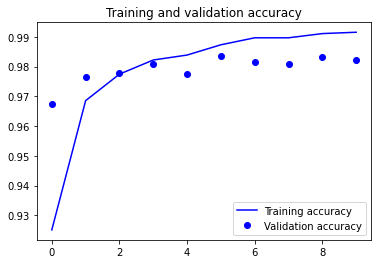

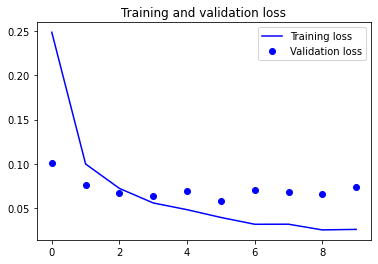

In [7]:
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'测试集损失值: {test_loss}, 测试集准确率: {test_acc}')

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

print(MNIST_h.history.keys())
accuracy = MNIST_h.history['accuracy']
val_accuracy = MNIST_h.history['val_accuracy']
loss = MNIST_h.history['loss']
val_loss = MNIST_h.history['val_loss']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy.png', bbox_inches='tight', dpi=300)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', bbox_inches='tight', dpi=300)

<font size=5>利用标准MNIST训练集训练出的模型测试自制手写数字测试集

训练集的样本数：4984，测试集的样本数：881
测试集的图像类别分布： Counter({9: 90, 0: 90, 1: 88, 4: 88, 2: 88, 8: 88, 3: 88, 6: 88, 7: 87, 5: 86})
My own x_train.shape:  (4984, 784)
My own y_train.shape:  (4984, 10)
My own x_test.shape:  (881, 784)
My own y_test.shape:  (881, 10)


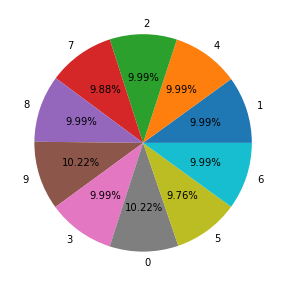

In [18]:
#读取本地mnist数据集
from mlxtend.data import loadlocal_mnist

#本地自制训练集
x_train_1, y_train_1 = loadlocal_mnist(
            images_path='C:/Users/liu_w/Desktop/MNISTlw/train-images-idx3-ubyte', 
            labels_path='C:/Users/liu_w/Desktop/MNISTlw/train-labels-idx1-ubyte')


#本地自制测试集
x_test_1, y_test_1 = loadlocal_mnist(
            images_path='C:/Users/liu_w/Desktop/MNISTlw/test-images-idx3-ubyte', 
            labels_path='C:/Users/liu_w/Desktop/MNISTlw/test-labels-idx1-ubyte')

'''
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.savefig('sample.png', bbox_inches='tight', dpi=300)
'''

print(f'训练集的样本数：{x_train_1.shape[0]}，测试集的样本数：{x_test_1.shape[0]}')
#print(f'输入图像的大小：{x_train_1.shape[1]}*{x_train_1.shape[2]}')

label_cnt = Counter(y_test_1)  # 统计
print('测试集的图像类别分布：', label_cnt)
plt.figure(figsize=(5, 5))
plt.pie(x=label_cnt.values(),
        labels=label_cnt.keys(),
        autopct='%.2f%%')
plt.savefig('label_distribution.png', bbox_inches='tight', dpi=300)


x_train_1 = x_train_1.astype('float32')
x_test_1 = x_test_1.astype('float32')
x_train_1 /= 255  # 规范化，将像素值缩至0-1之间
x_test_1 /= 255

y_train_1 = tf.keras.utils.to_categorical(y_train_1, num_class)  # 将标签向量转化为one-hot形式的向量
y_test_1 = tf.keras.utils.to_categorical(y_test_1, num_class)

print('My own x_train.shape: ', x_train_1.shape)
print('My own y_train.shape: ', y_train_1.shape)
print('My own x_test.shape: ', x_test_1.shape)
print('My own y_test.shape: ', y_test_1.shape)



28/28 [==============================] - 0s 1ms/step
测试集损失值: 3.023533344268799, 测试集准确率: 0.1543700397014618
[[ 1  2 13  5  6 19 15  9  8 12]
 [ 0  8 15  2 18 24  4  8  7  2]
 [ 0  2 17  4 12 33  8  8  2  2]
 [ 0  9 11  7 19 15  7  9  9  2]
 [ 0  4 15  3 18 13 16  7  4  8]
 [ 1  8  8  0 10 26 14  6  8  5]
 [ 0  5 12  2 20 17  8 11 11  2]
 [ 1  1 12  3  1 26  5 27  4  7]
 [ 2  5 11  2 21  9 10 16  8  4]
 [ 2  8 13  3 10  6  1 21 10 16]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


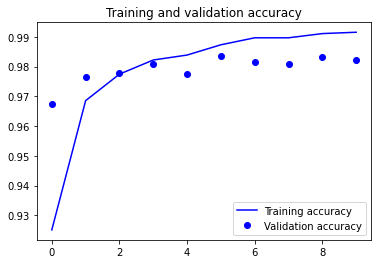

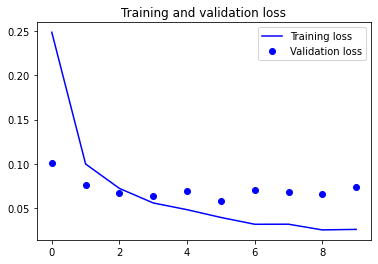

In [9]:
#test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
#print(f'测试集损失值: {test_loss}, 测试集准确率: {test_acc}')

y_pred_1 = model.predict(x_test_1)
y_pred_1 = np.argmax(y_pred_1, axis=1)
y_true_1 = np.argmax(y_test_1, axis=1)

test_loss, test_acc = model.evaluate(x_test_1, y_test_1, verbose=0)
print(f'测试集损失值: {test_loss}, 测试集准确率: {test_acc}')
cm = confusion_matrix(y_true_1, y_pred_1)
print(cm)

print(MNIST_h.history.keys())
accuracy = MNIST_h.history['accuracy']
val_accuracy = MNIST_h.history['val_accuracy']
loss = MNIST_h.history['loss']
val_loss = MNIST_h.history['val_loss']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy.png', bbox_inches='tight', dpi=300)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', bbox_inches='tight', dpi=300)

In [21]:
#使用自制手写数字数据集进行训练
MNISTlw_h = model.fit(x_train_1, y_train_1, batch_size=128, epochs=10, validation_data=(x_test_1, y_test_1))

Epoch 1/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0275 - accuracy: 0.9928 - val_loss: 4.9804 - val_accuracy: 0.5006
Epoch 2/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 4.9289 - val_accuracy: 0.5085
Epoch 3/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 4.9043 - val_accuracy: 0.5040
Epoch 4/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0118 - accuracy: 0.9974 - val_loss: 4.8816 - val_accuracy: 0.5040
Epoch 5/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 4.8240 - val_accuracy: 0.5119
Epoch 6/100
39/39 [==============================] - 0s 11ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 4.7932 - val_accuracy: 0.5119
Epoch 7/100
39/39 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 4.8008 - val_accuracy: 0.5165
Epoch 

x_train_1.shape:  (4984, 784)
y_train_1.shape:  (4984, 10)
x_test_1.shape:  (881, 784)
y_test_1.shape:  (881, 10)
测试集损失值: 2.0046377182006836, 测试集准确率: 0.5153235197067261
28/28 [==============================] - 0s 1ms/step
[[43  1  7  5 17 10  0  3  4  0]
 [ 0 78  0  3  0  5  1  1  0  0]
 [ 6 10 37  4  8 17  1  4  0  1]
 [ 3  8  2 39  3 17  4  2  9  1]
 [22  1  6  2 47  0  5  1  2  2]
 [10  9  4 13  1 36  8  3  0  2]
 [ 2  6  5 14 14  4 30  2  5  6]
 [ 1  5  5  3  0  5  1 62  0  5]
 [ 1  1  2  5  6 14 10  4 37  8]
 [ 1  1  1  8  5 11  0 12  6 45]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


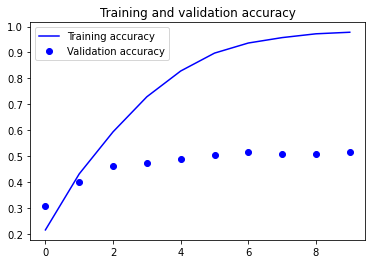

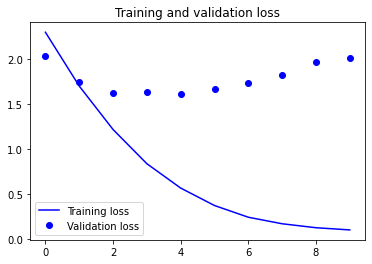

In [11]:
print('x_train_1.shape: ', x_train_1.shape)
print('y_train_1.shape: ', y_train_1.shape)
print('x_test_1.shape: ', x_test_1.shape)
print('y_test_1.shape: ', y_test_1.shape)
test_loss, test_acc = model.evaluate(x_test_1, y_test_1, verbose=0)
print(f'测试集损失值: {test_loss}, 测试集准确率: {test_acc}')

y_pred = model.predict(x_test_1)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_1, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

print(MNISTlw_h.history.keys())
accuracy = MNISTlw_h.history['accuracy']
val_accuracy = MNISTlw_h.history['val_accuracy']
loss = MNISTlw_h.history['loss']
val_loss = MNISTlw_h.history['val_loss']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy.png', bbox_inches='tight', dpi=300)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', bbox_inches='tight', dpi=300)

<font size=5>使用混合数据集进行训练

训练集的样本数：64984，测试集的样本数：10881
训练集的图像类别分布： Counter({1: 1223, 2: 1120, 7: 1115, 9: 1099, 3: 1098, 0: 1070, 4: 1070, 8: 1062, 6: 1046, 5: 978})
测试集的图像类别分布： Counter({1: 7242, 7: 6764, 3: 6628, 2: 6456, 9: 6445, 0: 6419, 6: 6418, 8: 6349, 4: 6340, 5: 5923})
Mixed MNIST x_train.shape:  (64984, 784)
Mixed MNIST y_train.shape:  (64984, 10)
Mixed MNIST x_test.shape:  (10881, 784)
Mixed MNIST y_test.shape:  (10881, 10)


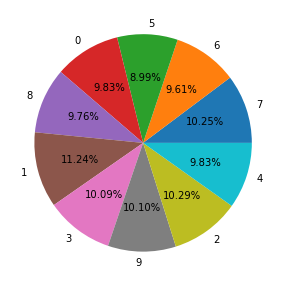

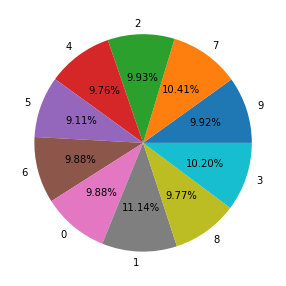

In [14]:
#使用自制手写数字与标准MNIST的混合数据集
x_train_2, y_train_2 = loadlocal_mnist(
            images_path='C:/Users/liu_w/Desktop/MNIST_and_MNISTlw/train-images-idx3-ubyte', 
            labels_path='C:/Users/liu_w/Desktop/MNIST_and_MNISTlw/train-labels-idx1-ubyte')

x_test_2, y_test_2 = loadlocal_mnist(
            images_path='C:/Users/liu_w/Desktop/MNIST_and_MNISTlw/test-images-idx3-ubyte', 
            labels_path='C:/Users/liu_w/Desktop/MNIST_and_MNISTlw/test-labels-idx1-ubyte')

'''
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.savefig('sample.png', bbox_inches='tight', dpi=300)
'''

print(f'训练集的样本数：{x_train_2.shape[0]}，测试集的样本数：{x_test_2.shape[0]}')

label_cnt = Counter(y_test_2)  # 统计
print('训练集的图像类别分布：', label_cnt)
plt.figure(figsize=(5, 5))
plt.pie(x=label_cnt.values(),
        labels=label_cnt.keys(),
        autopct='%.2f%%')
plt.savefig('label_distribution.png', bbox_inches='tight', dpi=300)

label_cnt = Counter(y_train_2)  # 统计
print('测试集的图像类别分布：', label_cnt)
plt.figure(figsize=(5, 5))
plt.pie(x=label_cnt.values(),
        labels=label_cnt.keys(),
        autopct='%.2f%%')
plt.savefig('label_distribution.png', bbox_inches='tight', dpi=300)


x_train_2 = x_train_2.astype('float32')
x_test_2 = x_test_2.astype('float32')
x_train_2 /= 255  # 规范化，将像素值缩至0-1之间
x_test_2 /= 255

y_train_2 = tf.keras.utils.to_categorical(y_train_2, num_class)  # 将标签向量转化为one-hot形式的向量
y_test_2 = tf.keras.utils.to_categorical(y_test_2, num_class)

print('Mixed MNIST x_train.shape: ', x_train_2.shape)
print('Mixed MNIST y_train.shape: ', y_train_2.shape)
print('Mixed MNIST x_test.shape: ', x_test_2.shape)
print('Mixed MNIST y_test.shape: ', y_test_2.shape)

In [26]:
#使用混合手写数字数据集进行训练
MixedMNIST_h = model.fit(x_train_2, y_train_2, batch_size=128, epochs=20, validation_data=(x_test_2, y_test_2))

Epoch 1/20
508/508 [==============================] - 4s 8ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.5252 - val_accuracy: 0.9471
Epoch 2/20
508/508 [==============================] - 4s 8ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.5373 - val_accuracy: 0.9461
Epoch 3/20
508/508 [==============================] - 4s 8ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.5859 - val_accuracy: 0.9461
Epoch 4/20
508/508 [==============================] - 4s 8ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.5448 - val_accuracy: 0.9461
Epoch 5/20
508/508 [==============================] - 4s 8ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.5701 - val_accuracy: 0.9446
Epoch 6/20
508/508 [==============================] - 4s 8ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.5567 - val_accuracy: 0.9460
Epoch 7/20
508/508 [==============================] - 4s 8ms/step - loss: 0.0103 - accuracy: 0.9974 - val_loss: 0.5546 - val_accuracy: 0.9446
Epoch 

测试集损失值: 0.29503995180130005, 测试集准确率: 0.9436632394790649
341/341 [==============================] - 0s 974us/step
[[1012    1   10    5   16   13    3    6    2    2]
 [   0 1202    6    1    2    3    3    3    1    2]
 [   6   12 1067    4    8   10    1    6    5    1]
 [   1   14   11 1016    6   22    6    5   10    7]
 [  19    1   19    2 1003    1   10    3    4    8]
 [  13   14    6   14    2  909   11    4    1    4]
 [   9   11   10    8   15    5  976    1    7    4]
 [   2    7   16    1    0    4    3 1075    1    6]
 [   2    5    8    8    5   21   12    5  978   18]
 [   1    5    2    8    8    6    2   27   10 1030]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


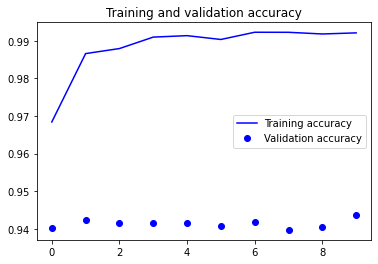

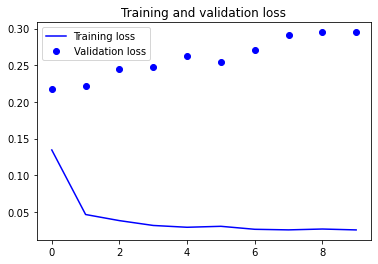

In [16]:
test_loss, test_acc = model.evaluate(x_test_2, y_test_2, verbose=0)
print(f'测试集损失值: {test_loss}, 测试集准确率: {test_acc}')

y_pred = model.predict(x_test_2)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_2, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

print(MixedMNIST_h.history.keys())
accuracy = MixedMNIST_h.history['accuracy']
val_accuracy = MixedMNIST_h.history['val_accuracy']
loss = MixedMNIST_h.history['loss']
val_loss = MixedMNIST_h.history['val_loss']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy.png', bbox_inches='tight', dpi=300)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', bbox_inches='tight', dpi=300)

测试集损失值: 5.906041145324707, 测试集准确率: 0.5062429308891296
28/28 [==============================] - 0s 1ms/step
[[43  3  6  6 14 11  0  5  2  0]
 [ 0 81  0  0  0  4  1  2  0  0]
 [ 3 15 33  3  8 11  4  9  1  1]
 [ 0 14  2 37  3 14  4  5  9  0]
 [16  4  3  4 42  3  8  4  2  2]
 [ 5 19  3  9  2 35  6  3  1  3]
 [ 8  8  5  9  8  3 35  1  5  6]
 [ 2  6  3  1  0  3  4 59  0  9]
 [ 0  6  1  6  1 12 11 11 33  7]
 [ 3  5  1  2  3  5  3 15  5 48]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


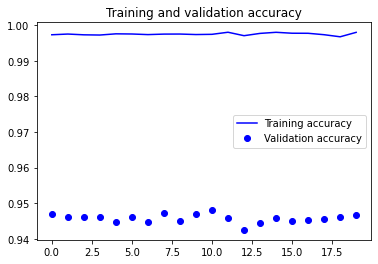

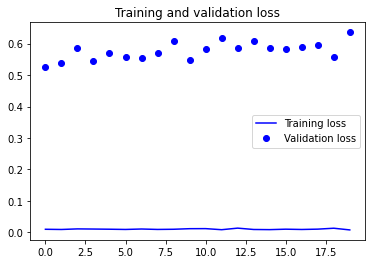

In [27]:
#预测自制手写数字测试集
test_loss, test_acc = model.evaluate(x_test_1, y_test_1, verbose=0)
print(f'测试集损失值: {test_loss}, 测试集准确率: {test_acc}')

y_pred = model.predict(x_test_1)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_1, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

print(MixedMNIST_h.history.keys())
accuracy = MixedMNIST_h.history['accuracy']
val_accuracy = MixedMNIST_h.history['val_accuracy']
loss = MixedMNIST_h.history['loss']
val_loss = MixedMNIST_h.history['val_loss']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy.png', bbox_inches='tight', dpi=300)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', bbox_inches='tight', dpi=300)

测试集损失值: 0.17200499773025513, 测试集准确率: 0.9855999946594238
313/313 [==============================] - 0s 1ms/step
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1129    2    1    0    1    0    0    2    0]
 [   1    1 1019    0    2    0    1    5    3    0]
 [   1    0    2  995    0    2    0    4    1    5]
 [   1    2    1    0  970    0    4    0    1    3]
 [   2    0    0    6    0  875    3    1    2    3]
 [   2    2    0    1    4    1  948    0    0    0]
 [   3    2    8    0    1    0    0 1010    2    2]
 [   2    0    1    4    3    1    3    4  951    5]
 [   1    3    0    1   10    2    1    5    1  985]]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


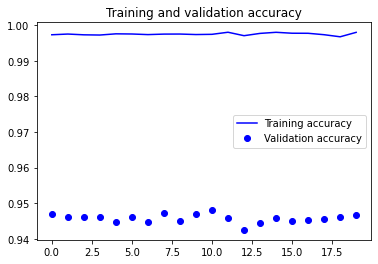

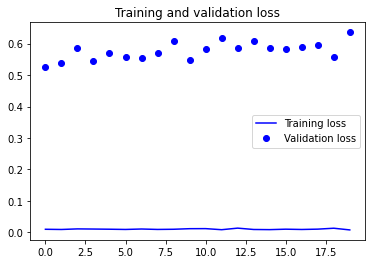

In [28]:
#预测标准MNIST测试集
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'测试集损失值: {test_loss}, 测试集准确率: {test_acc}')

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

print(MixedMNIST_h.history.keys())
accuracy = MixedMNIST_h.history['accuracy']
val_accuracy = MixedMNIST_h.history['val_accuracy']
loss = MixedMNIST_h.history['loss']
val_loss = MixedMNIST_h.history['val_loss']
epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy.png', bbox_inches='tight', dpi=300)

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', bbox_inches='tight', dpi=300)